In [2]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2024 World Happiness Report

In [3]:
## verify encoding of csv
import chardet

with open('./world happiness data/World-happiness-report-2024.csv', 'rb') as file:
    data = file.read()  # Read the whole file as bytes
    result = chardet.detect(data)
    print(f"Detected encoding: {result['encoding']}")

Detected encoding: ascii


In [4]:
## dataset: https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated
## use identified encoding to read csv
## we start by looking at 2024's results
whr = pd.read_csv('./world happiness data/World-happiness-report-2024.csv', encoding='ascii')
whr.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [5]:
## look at dtypes of dataset
whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [6]:
whr.shape
## there are 143 records (countries) with 12 features

(143, 12)

In [7]:
## verify that each row represents a unique country
whr['Country name'].nunique()

143

In [8]:
## look at numeric data to make sure there aren't erroneous data
## e.g. ladder score should be between 0 and 10
whr.describe()


,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [9]:
## there are 3 countries with missing values
whr[whr.isnull().any(axis=1)]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
61,Bahrain,Middle East and North Africa,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Tajikistan,Commonwealth of Independent States,5.281,5.361,5.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,State of Palestine,Middle East and North Africa,4.879,5.006,4.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
## for this project, we will ignore these countries
whr_cleaned = whr.copy().dropna()
whr_cleaned.shape

(140, 12)

We'll be looking at the remaining 140 countries for the rest of this project.

The terms "happiness score" and "ladder score" will be used interchangeably.

In [11]:
## since the dataset is ordered, we can include another column to represent rank
whr_cleaned['Happiness rank'] = range(1, len(whr_cleaned)+1)
whr_cleaned.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness rank
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,2
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,3
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,4
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,5


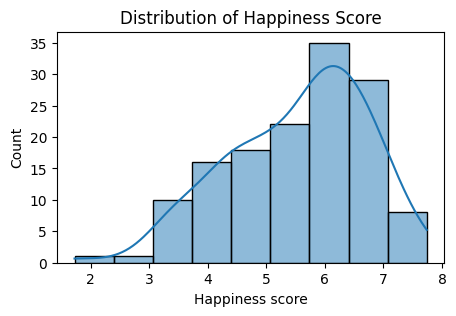

In [12]:
## take a look at the distribution of happiness scores
plt.figure(figsize=(5,3))
sns.histplot(data=whr_cleaned, x="Ladder score", kde=True)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness score')
plt.show()

The distribution of happiness scores show that most countries are generally happy with a score of around 6/10.

Globally, the distribution is also skewed left, suggesting that countries around the world tend to be happy.

In [13]:
## look at the distinct regions and their mean happiness
region_mean = whr_cleaned.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=True)
region_mean

Regional indicator
South Asia                            3.895667
Sub-Saharan Africa                    4.329686
Middle East and North Africa          5.170733
Southeast Asia                        5.551889
Commonwealth of Independent States    5.567111
East Asia                             5.934333
Latin America and Caribbean           6.143368
Central and Eastern Europe            6.170941
Western Europe                        6.841650
North America and ANZ                 6.927750
Name: Ladder score, dtype: float64

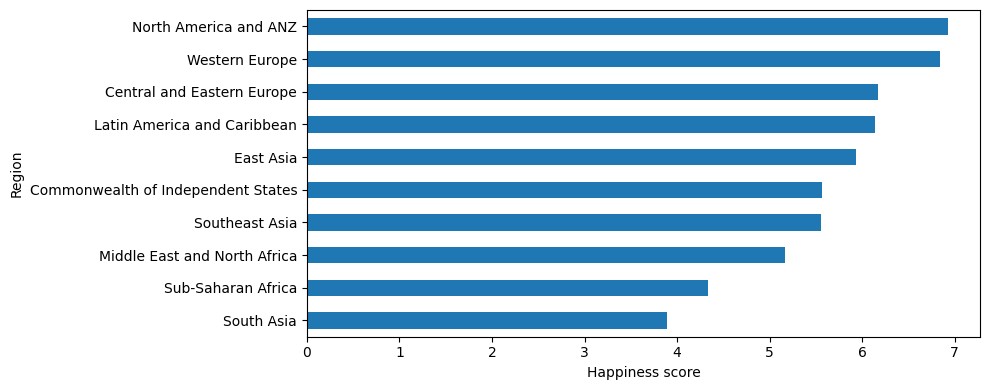

In [14]:
region_mean.plot.barh(figsize=(10,4))
plt.ylabel('Region')
plt.xlabel('Happiness score')

plt.tight_layout()
plt.show()

## north america & ANZ have the highest happiness score
## south asia has the least happiness score

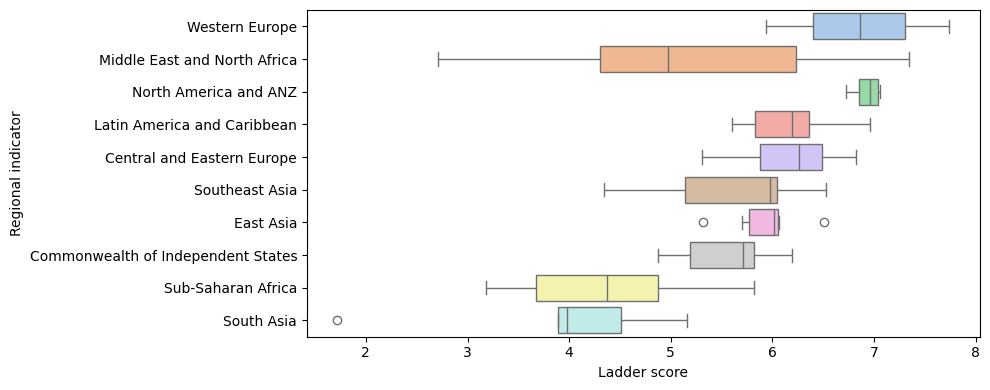

In [54]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Ladder score', y='Regional indicator', data=whr_cleaned, orient='h', hue='Regional indicator', palette='pastel')
plt.tight_layout()
plt.show()

## east asia has outliers on either ends
## south asia has outlier
## middle east & north africa has largest deviations across countries
## north america & anz has the highest average happiness with least deviation i.e. countries in this region tend to have high happiness

From the box plot, we can see that there are a few outliers which we can investigate further.

In [16]:
## south asia outlier
whr_cleaned[(whr_cleaned['Regional indicator']=='South Asia') & (whr_cleaned['Ladder score']<2)]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness rank
142,Afghanistan,South Asia,1.721,1.775,1.667,0.628,0.0,0.242,0.0,0.091,0.088,0.672,140


Afghanistan is an outlier in South Asia with a ladder score of only 1.721. Additionally, it is also the lowest ranking country (140 out of 140) in our cleaned dataset.

In [17]:
## east asia outliers
whr_cleaned[(whr_cleaned['Regional indicator']=='East Asia') & ((whr_cleaned['Ladder score']<5.5) | (whr_cleaned['Ladder score']>6.5))]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness rank
30,Taiwan Province of China,East Asia,6.503,6.597,6.410,1.842,1.346,0.650,0.649,0.068,0.202,1.747,31
85,Hong Kong S.A.R. of China,East Asia,5.316,5.403,5.229,1.909,1.184,0.857,0.485,0.147,0.402,0.333,85


In East Asia, there are also outliers, with Taiwan having much a higher ladder score of 6.597 than the other countries in the region, and Hong Kong having a much lower ladder of 5.403 than the other countries in the region.

In the Middle East & North Africa region, there is a very big difference between the highest and lowest ladder (happiness) scores.

In [18]:
## lowest happiness score in region
me_na_min = whr_cleaned[whr_cleaned['Regional indicator']=='Middle East and North Africa']['Ladder score'].min()
whr_cleaned[whr_cleaned['Ladder score']==me_na_min]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness rank
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,139


In [19]:
## highest happiness score in region
me_na_max = whr_cleaned[whr_cleaned['Regional indicator']=='Middle East and North Africa']['Ladder score'].max()
whr_cleaned[whr_cleaned['Ladder score']==me_na_max]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness rank
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.74,0.641,0.153,0.193,2.298,5


<Axes: >

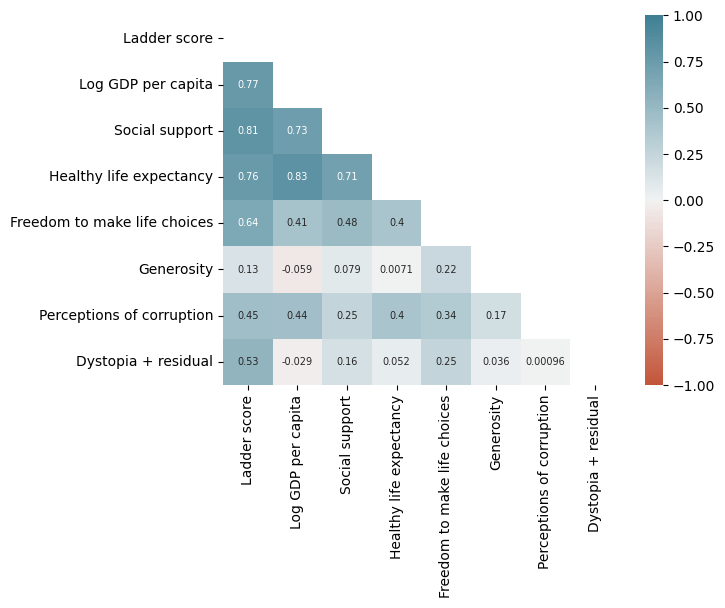

In [20]:
## correlation
columns = [
    'Ladder score', 
    'Log GDP per capita', 
    'Social support', 
    'Healthy life expectancy', 
    'Freedom to make life choices', 
    'Generosity',
    'Perceptions of corruption',
    'Dystopia + residual']

corrmat = whr_cleaned[columns].corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

From the correlation matrix, we can see that there is a general positive correlation between ladder score and log GDP per capita, social support and healthy life expectancy.

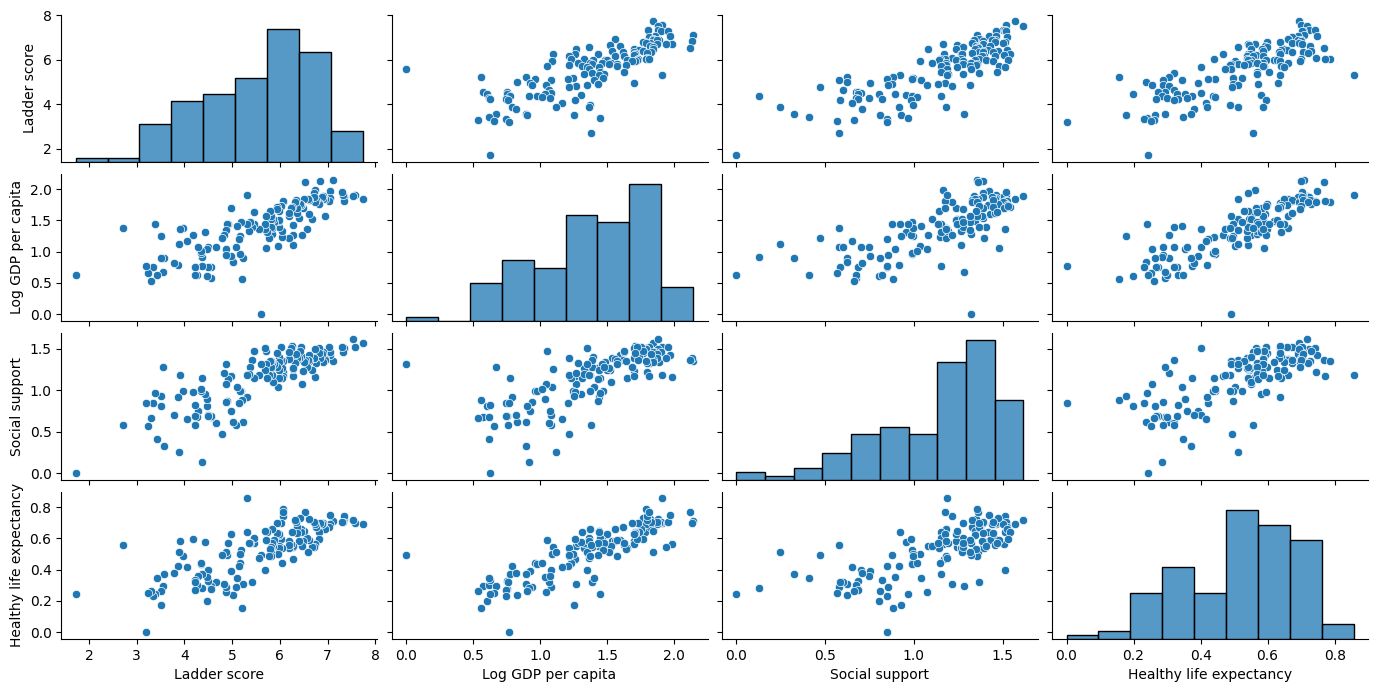

In [21]:
sns.pairplot(whr_cleaned[['Ladder score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']], height=1.75, aspect=2)
plt.show()

As seen in the pairplot above, it visually confirms the positive correlation between ladder score and gdp per capita, social support, healthy life expectancy. As GDP per capita (social support / healthy life expectancy) increases, ladder score tends to increase as well.

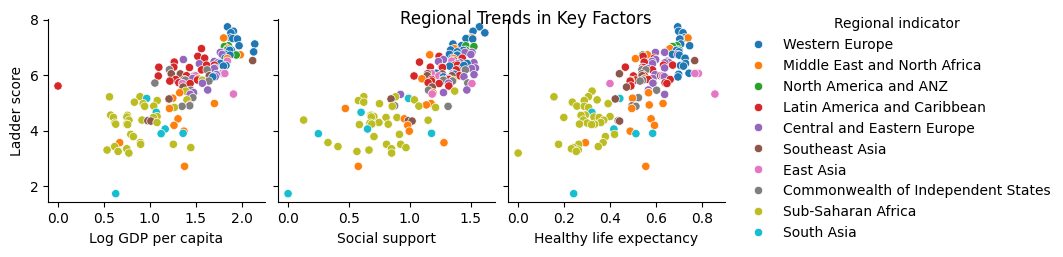

In [22]:
## look at pairplots colored by region
pairplot = sns.pairplot(whr_cleaned, 
             hue='Regional indicator', 
             x_vars=['Log GDP per capita', 'Social support', 'Healthy life expectancy'], 
             y_vars=['Ladder score'], 
             kind='scatter')
plt.suptitle('Regional Trends in Key Factors')
plt.show()

The dark blue points representing western europe tend to be on the upper end of the ladder score, as well as the key factors. 

This was also observed in the box plot above and values amongst its individual countries are more closely distributed compared to e.g. Middle East & North Africa (in orange) where we see a wider difference in ladder score.

### World Happiness Report over time

In [23]:
with open('./world happiness data/World-happiness-report-updated_2024.csv', 'rb') as file:
    data = file.read()  # Read the whole file as bytes
    result = chardet.detect(data)
    print(f"Detected encoding: {result['encoding']}")

Detected encoding: ISO-8859-1


In [24]:
## see how happiness changed over time by region
whr_over_time = pd.read_csv('./world happiness data/World-happiness-report-updated_2024.csv', encoding='ISO-8859-1')
whr_over_time.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [25]:
whr_over_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [26]:
whr_over_time.groupby(by=['Country name']).agg(
    unique_years=('year', 'nunique'),
    min_year=('year', 'min'),
    max_year=('year', 'max')
)

,unique_years,min_year,max_year
Country name,,,
Afghanistan,15,2008,2023
Albania,16,2007,2023
Algeria,11,2010,2022
Angola,4,2011,2014
Argentina,18,2006,2023
...,...,...,...
Venezuela,18,2005,2023
Vietnam,18,2006,2023
Yemen,14,2007,2023


There are a total of 2,363 records in this report, each country has a different number of records, and different min and max years that the values were reported on e.g. Angola was reported for 4 years from 2011 to 2014, whereas Vietnam was report for 18 years from 2006 to 2023.

In [27]:
combined_whr = whr_over_time.merge(right=whr_cleaned[['Country name', 'Regional indicator']], how='left', on='Country name')
combined_whr.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,South Asia
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,South Asia
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,South Asia
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,South Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,South Asia


In [28]:
whr_cleaned['Regional indicator'].unique()

array(['Western Europe', 'Middle East and North Africa',
       'North America and ANZ', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'Southeast Asia', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [29]:
## check for missing regions
combined_whr[combined_whr['Regional indicator'].isnull()]['Country name'].unique()

array(['Angola', 'Bahrain', 'Belarus', 'Belize', 'Bhutan', 'Burundi',
       'Central African Republic', 'Cuba', 'Djibouti', 'Guyana', 'Haiti',
       'Maldives', 'Oman', 'Qatar', 'Rwanda', 'Somalia',
       'Somaliland region', 'South Sudan', 'State of Palestine', 'Sudan',
       'Suriname', 'Syria', 'Tajikistan', 'Trinidad and Tobago',
       'Turkmenistan', 'Türkiye'], dtype=object)

In [30]:
## fill in missing regions
country_region = {'Angola':'Sub-Saharan Africa', 
                   'Bahrain':'Middle East and North Africa',
                   'Belarus':'Commonwealth of Independent States',
                   'Belize':'Latin America and Caribbean',
                   'Bhutan':'South Asia',
                   'Burundi':'Sub-Saharan Africa',
                   'Central African Republic':'Sub-Saharan Africa',
                   'Cuba':'Latin America and Caribbean',
                   'Djibouti':'Middle East and North Africa',
                   'Guyana':'Latin America and Caribbean',
                   'Haiti':'Latin America and Caribbean',
                   'Maldives':'South Asia',
                   'Oman':'Middle East and North Africa',
                   'Qatar':'Middle East and North Africa',
                   'Rwanda':'Sub-Saharan Africa',
                   'Somalia':'Sub-Saharan Africa',
                   'Somaliland region':'Sub-Saharan Africa',
                   'South Sudan':'Sub-Saharan Africa',
                   'State of Palestine':'Middle East and North Africa',
                   'Sudan':'Middle East and North Africa',
                   'Suriname':'Latin America and Caribbean',
                   'Syria':'Middle East and North Africa',
                   'Tajikistan':'Commonwealth of Independent States',
                   'Trinidad and Tobago':'Latin America and Caribbean',
                   'Turkmenistan':'Commonwealth of Independent States',
                   'Türkiye':'Central and Eastern Europe'}

combined_whr.loc[combined_whr['Regional indicator'].isnull(), 'Regional indicator'] = combined_whr['Country name'].map(country_region)

## double check to make sure no more missing regions
combined_whr[combined_whr['Regional indicator'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator


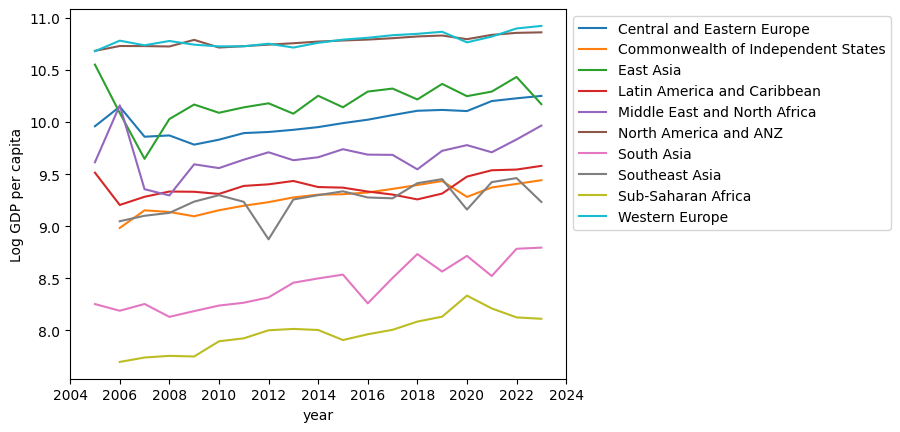

In [31]:
sns.lineplot(x='year', y='Log GDP per capita', 
             hue='Regional indicator', 
             data=combined_whr.groupby(by=['Regional indicator', 'year'])['Log GDP per capita'].agg('mean').reset_index())

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks([2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024])
plt.show()

Generally, gdp per capita has increased globally throughout the years

If we take a closer look at the individual countries' gdp per capita, we can see that the general positive trend is reflective across all countries. 

We also can see a pattern of a slight dip in gdp per capita in 2020 which could possibly be a result of the COVID-19 pandemic.

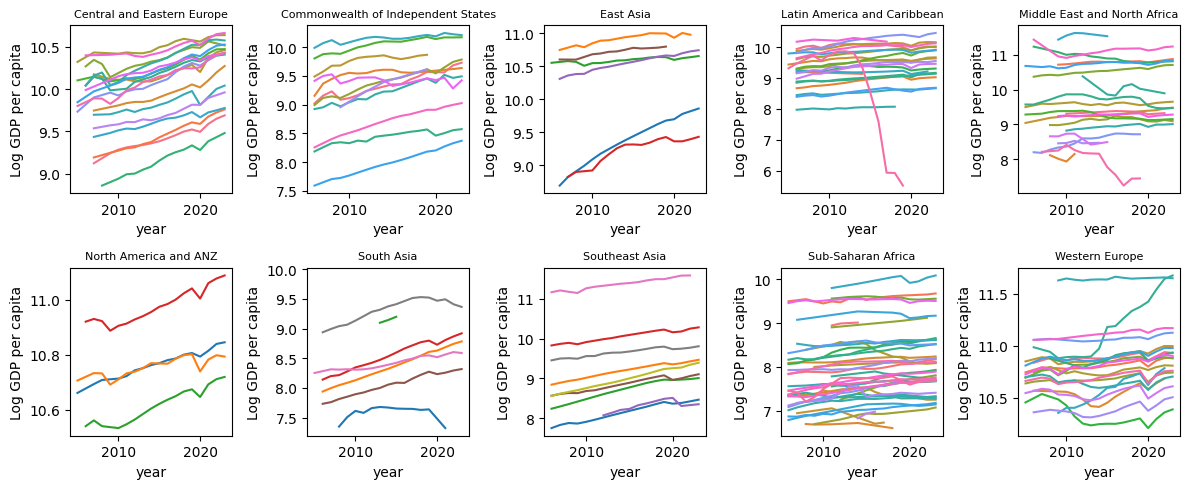

In [53]:
regions = ['Central and Eastern Europe', 'Commonwealth of Independent States', 'East Asia', 'Latin America and Caribbean', 
           'Middle East and North Africa', 'North America and ANZ', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
k = 0
for i in range(2):
    for j in range(5):
      sns.lineplot(x='year', y='Log GDP per capita', 
                  hue='Country name', 
                  data=combined_whr[combined_whr['Regional indicator']==regions[k]]\
                     .groupby(by=['Country name', 'year'])['Log GDP per capita'].agg('mean').reset_index(),
                  ax=axes[i, j],
                  legend=False)
      axes[i, j].set_title(regions[k], fontsize=8)
      k += 1

plt.tight_layout()
plt.show()